In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw01.ok')

Assignment: hw01
OK, version v1.12.5



## Homework 1

### Personal network surveys

In this homework, we will be analyzing some data from the [General Social Survey](http://gss.norc.org/) (GSS).
The GSS is the survey that was the basis of the debate over whether or not Americans are becoming more socially isolated, which we discussed in class.

The goal of this homework is to help you practice how to clean and reorganize a large survey dataset and do simple analysis with it.

In [2]:
!pip install jassign

  Using cached https://files.pythonhosted.org/packages/74/e2/b0c116e0644b61721d89dcbfae0bb1042d92391e4f780987eb6f53ffe3da/jassign-0.0.7-py3-none-any.whl


In [6]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

The file `GSS.csv` has an extract from the GSS which we will analyze today.

Here is the [codebook](http://gss.norc.org/documents/codebook/GSS_Codebook.pdf) for the entire GSS. Of course, the GSS is huge, so you will have to search through for the variable names included in this extract. (Don't do this by hand -- use your pdf viewer's search function.)

Read the GSS extract into a Table called `gss_data`.

In [7]:
url = 'GSS.csv'
gss_data = Table.read_table(url)
print(gss_data.take[20501])

year | id   | marital | age  | numgiven | sex1 | sex2 | sex3 | sex4 | sex5 | spouse1 | spouse2 | spouse3 | spouse4 | spouse5 | age1 | age2 | age3 | age4 | age5
1987 | 446  | 1       | 60   | 3        | 0    | 0    | 0    | 0    | 0    | 2       | 2       | 2       | 0       | 0       | -1   | -1   | -1   | -1   | -1


In [8]:
# You can take a look at how big the dataset is
gss_data.show(10)

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1972,1,5,23,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,2,1,70,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,3,1,48,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,4,1,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,5,1,61,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,6,5,26,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,7,3,28,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,8,5,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,9,5,21,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,10,1,30,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1


**Question 1** How many rows and how many columns does `gss_data` have? Print out the first several rows to take a look at its contents.

Hint: you may want to investigate how to count the number of colomns.

<!--
BEGIN QUESTION
name: q1
points: 4
manual: False
-->

**To show a Table's row & col :**
```
Table.num_rows
len(gss_data.take[0]) 
```

In [9]:
gss_number_of_rows = gss_data.num_rows
gss_number_of_cols = len(gss_data.take[0])
print("num rows: ", gss_number_of_rows)
print("num cols: ", gss_number_of_cols)

num rows:  59599
num cols:  20


In [10]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2** What range of years is covered by this dataset? Answer this by finding the largest and smallest year.

The functions you need are np.max and np.min

<!--
BEGIN QUESTION
name: q2
points: 4
manual: False
-->

**Table.column('Attributes_name')** return a narray of the list we select.
**np.max() & np.min()** : return the max & min num of the narray. 

In [11]:
largest_year = gss_data.column('year').max()
smallest_year = gss_data.column('year').min()
print("earliest year: ", smallest_year)
print("latest year: ", largest_year)

earliest year:  1972
latest year:  2014


In [12]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



We are interested in the years when the 'important matters' question was asked of survey respondents. It turns out that this question was only asked for 1985 and 2004. In order to continue with our analysis, we will pick out only the rows of the dataset that correspond to the years we are interested in.

**Question 3** Make two new datasets: `gss_1985` and `gss_2004` which have only the responses from 1985 and from 2004.

Hint: how to select rows?
Function you need: are.equal_to(number))

<!--
BEGIN QUESTION
name: q3
points: 4
manual: False
-->

** select some specific rows of table ** : table.where(condition_input)
    note : 1. condition can be a bool type narray
           2. Table('col_name', select_condition)     

In [13]:
# gss_1985 = gss_data.where('year', 1985)
# gss_2004 = gss_data.where('year', 2004)
gss_1985 = gss_data.where(gss_data.column('year') == 1985)
gss_2004 = gss_data.where(gss_data.column('year') == 2004)

In [14]:
gss_1985.column('numgiven')[1000:]

array([6, 4, 3, 5, 4, 4, 5, 5, 3, 5, 4, 4, 1, 3, 1, 2, 3, 4, 2, 5, 2, 5,
       2, 5, 0, 1, 3, 3, 4, 1, 2, 2, 1, 3, 0, 3, 3, 4, 3, 2, 3, 3, 4, 3,
       2, 1, 3, 2, 4, 4, 1, 5, 4, 0, 5, 5, 6, 0, 4, 1, 3, 3, 5, 5, 3, 3,
       4, 6, 5, 4, 6, 4, 6, 5, 5, 4, 5, 2, 1, 3, 5, 4, 4, 3, 3, 1, 1, 6,
       4, 4, 1, 2, 5, 5, 5, 4, 3, 5, 5, 3, 3, 1, 5, 5, 6, 4, 3, 4, 4, 2,
       4, 3, 3, 4, 0, 5, 3, 1, 1, 1, 3, 1, 3, 4, 3, 6, 4, 4, 3, 3, 2, 0,
       5, 3, 5, 2, 6, 1, 2, 1, 5, 3, 3, 4, 2, 0, 2, 4, 3, 5, 3, 4, 3, 0,
       0, 1, 0, 3, 0, 2, 3, 3, 4, 2, 1, 0, 3, 1, 5, 5, 4, 5, 3, 5, 0, 5,
       3, 2, 1, 5, 2, 3, 3, 2, 1, 2, 3, 3, 2, 5, 1, 3, 1, 5, 3, 5, 5, 4,
       5, 6, 6, 3, 5, 5, 5, 4, 3, 6, 6, 5, 3, 6, 5, 4, 5, 3, 1, 3, 0, 1,
       1, 1, 0, 3, 2, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 5, 0, 0, 1, 3, 0, 1,
       5, 0, 2, 3, 0, 4, 0, 6, 2, 1, 3, 5, 2, 2, 0, 5, 0, 2, 5, 4, 4, 3,
       2, 2, 3, 0, 3, 3, 2, 3, 2, 2, 0, 2, 5, 0, 5, 2, 3, 2, 2, 1, 5, 5,
       3, 2, 0, 0, 3, 0, 3, 3, 4, 1, 5, 4, 0, 2, 1,

In [15]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4** Make a table of the responses to the `numgiven` question for each year. That is, try grouping the responses by the different values of "numgiven" variable. Numgiven counts the number of the names each respondents gave to answer the important issue question.

Your tables should have "numgiven" as the first column, with values from 0 to 9, and "count" as the second column, summarizing how many people gave 0 names, 1 name, 2 names, ..., to the question.

<!--
BEGIN QUESTION
name: q4
points: 4
manual: False
-->

**using group to analyze the data** :
    usage: Table.group('column_input', collect = '')

In [16]:
gss_1985_numgiven = gss_1985.group('numgiven')
gss_2004_numgiven = gss_2004.group('numgiven')

In [17]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [18]:
# You can take a look at these two tables
gss_1985_numgiven

numgiven,count
0,136
1,228
2,235
3,321
4,233
5,294
6,84
9,3


In [19]:
gss_2004_numgiven

numgiven,count
-1,1340
0,356
1,281
2,263
3,232
4,128
5,96
6,70
9,46


Your table for 2004 should show that quite a few respondents have -1 as the value of `numgiven`. These respondents actually did not answer the important matters name generator.

**Question 5** Now, narrow the 2004 dataset down so that it does not have the respondents who have -1 values for `numgiven`, and the filtered dataset is gss_2004_interviewed.

The function you need: are.above(number)

<!--
BEGIN QUESTION
name: q5
points: 2
manual: False
-->

In [20]:
gss_2004_interviewed = gss_2004.where(gss_2004.column('numgiven') > -1)

In [21]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6** Besides -1, some other answer is also invalid (check the interview codebook). Narrow both datasets down so that they only have respondents who were asked the `numgiven` question and who provided valid answers to that question.

<!--
BEGIN QUESTION
name: q6
points: 4
manual: False
-->

In [22]:
gss_1985_responded = gss_1985.where(~(gss_1985.column('numgiven') == 9))
gss_2004_responded = gss_2004_interviewed.where(~(gss_2004_interviewed.column('numgiven') == 9))
# gss_1985_responded = gss_1985.where(~np.isnan((gss_1985).column('numgiven')) & gss_1985.column('numgiven') > -1).take[:1531]
# gss_2004_responded = gss_2004_interviewed.where(~np.isnan((gss_2004_interviewed).column('numgiven')))

In [23]:
ok.grade("q6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now we have the set of respondents we will study in more detail: those who responded to the 'important matters' name generator.

**For the problems below, please use `gss_1985_responded` and `gss_2004_responded`.**

Many analysts have focused on how many survey respondents report that they don't discuss important matters with anyone.  They interpret the fraction of respondents who don't report discussing important matters with anyone as an indicator for the amount of social isolation. (These respondents who report not discussing important matters with anyone have `numgiven` equal to 0.)

**Question 7** Do you think this is a good way to try to quantify social isolation? Name one way this could be a good measure of social isolation, and one way this could be a bad measure of social isolation. Please be specific.

<!--
BEGIN QUESTION
name: q7
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [24]:
# In General 
#     I think interpret the fradtion of respondents who report numgiven equal to 0 as the amount of social isolation is an
# efficient but not accurate way to measure the social isolation.

# To be specific
#     It's a efficient way because the rate of people who don;t report discussing matters with anyone represent social 
# isolation to some extend. And it doesn't need to do more survey to search more information about the respondent.
#     But it is also Unconvincing because the reason of respondent do not discussing matters with anyone is complex ，
# maybe he/she forgot to talk about this issue or he/she is just in a hurry and forget to answer this question. So
# we need more details info to make our research more convincing.
.

For both the 1985 and 2004 datasets, we now create a new variable, `isolated` which has the value False if the respondent reports discussing important matters with anyone, and True otherwise.

In [25]:
isolated_1985 = gss_1985_responded.column("numgiven") == 0
isolated_2004 = gss_2004_responded.column("numgiven") == 0
# print(isolated_1985)

**Question 8** Using the variable you just created, what proportion of respondents was socially isolated in 1985? In 2004? 

Hint: how did we compute proportions in lab1?

<!--
BEGIN QUESTION
name: q8
points: 2
manual: False
-->

In [26]:
proportion_isolated_1985 = np.mean(isolated_1985)
proportion_isolated_2004 = np.mean(isolated_2004)
print("Proportion isolated in 1985: ", round(proportion_isolated_1985, 3))
print("Proportion isolated in 2004: ", round(proportion_isolated_2004, 3))

Proportion isolated in 1985:  0.089
Proportion isolated in 2004:  0.25


In [27]:
ok.grade("q8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Here is a function that you may find useful in answering the next question. Given a row in a GSS dataset, the function returns `True` if one of the alters is a spouse, and `False` otherwise:

In [28]:
# Don't forget to run this cell
def reports_spouse(row):
    return(row.item('spouse1') == 1 or row.item('spouse2') == 1 or row.item('spouse3') == 1 or row.item('spouse4') == 1 or row.item('spouse5') == 1)

**Question 9** What proportion of married respondents named a spouse in these two surveys?

<!--
BEGIN QUESTION
name: q9
points: 4
manual: False
-->

In [29]:
married_1985 = gss_1985_responded.where("marital", are.equal_to(1))

married_spouses_1985 = married_1985.apply(reports_spouse)

married_spouses_proportion_1985 = married_1985.where(married_spouses_1985).num_rows / married_1985.num_rows

married_2004 = gss_2004_responded.where("marital", are.equal_to(1))
married_spouses_2004 = married_2004.apply(reports_spouse)
married_spouses_proportion_2004 = married_2004.where(married_spouses_2004).num_rows / married_2004.num_rows
print("proportion of married respondents naming spouse in 1985: ", married_spouses_proportion_1985)
print("proportion of married respondents naming spouse in 2004: ", married_spouses_proportion_2004)

proportion of married respondents naming spouse in 1985:  0.674712643678161
proportion of married respondents naming spouse in 2004:  0.5810635538261998


In [30]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Homophily

Below, you will find the functions that we used to convert data from wide to long as part of Lab 1. The `wide_to_long` function has been slightly modified to account for the different format of the variable names in the GSS dataset, but it works in the same way we saw in the lab.

In [31]:
def repeat_single_col(data, var_name, times=5):
    """Repeats a single column multiple times.
    
    Parameters
    ----------
    var_name : str
        Text that contains the name of the column to repeat.
    
    Returns
    -------
    np.array
        A single array with the contents of the column repeated five times.
    
    Examples
    --------
    >>> repeat_single_col(Table().with_columns(['respondent_age', [10]]),
                          'respondent_age')
    
    array([10, 10, 10, 10, 10])
    """
    new_col = np.tile(data.column(var_name), times)
    return new_col

def wide_to_long(data, var_name, times=5):
    """Given columns of alter characteristics, stack them into one long column.
    
    Parameters
    ----------
    data : Table
        The data table containing the alter characteristics
    var_name : str
        Text that contains the variable name; columns of the dataset should
        match the pattern: [var_name][alter_number]
        For example, if var_name is 'age' then this function expects to find
        columns in the survey dataset named 
        'age1', 'age2', 'age3', 'age4', and 'age5'
    times : int
        The number of columns for each characteristic
    
    Returns
    -------
    np.array
        A single array with the contents of all of the columns stacked on top of one another.
    
    Examples
    --------
    >>> wide_to_long(Table().with_columns(['age1', [10, 15],
                                           'age2', [30, 35],
                                           'age3', [20, 15],
                                           'age4', [60, 70],
                                           'age5', [20, 25]]),
                     'age')
    
    array([10, 15, 30, 35, 20, 15, 60, 70, 20, 25])
    """
    new_col = np.concatenate([data.column(var_name + str(idx)) for idx in range(1,times+1)])
    return new_col

**Question 10** Now we will use these functions to convert the wide-format data from 1985 and 2004 into long format. This will enable us to examine whether or not there is evidence of homophily in the GSS confidant reports from those two years.

Follow the pattern that we used in Lab 1 to do this. Be sure the tables you created include the following columns:

* ego's age
* alter's sex
* alter's age

Hint: make sure you use the filtered datasets.

<!--
BEGIN QUESTION
name: q10
points: 4
manual: False
-->

In [32]:
gss_1985_long_raw = Table().with_columns(['age', repeat_single_col(gss_1985_responded, 'age'),
                                          'alter_sex', wide_to_long(gss_1985_responded, 'sex'),
                                          'alter_age', wide_to_long(gss_1985_responded, 'age')
                                         ])
gss_2004_long_raw = Table().with_columns(['age', repeat_single_col(gss_2004_responded, 'age'),
                                          'alter_sex', wide_to_long(gss_2004_responded, 'sex'),
                                          'alter_age', wide_to_long(gss_2004_responded, 'age')
                                         ])

In [33]:
ok.grade("q10");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [34]:
# You can take a look and check if your transformation is correct
gss_1985_responded.show()

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1985,1,1,33,6,1,2,1,1,2,2,1,2,2,2,32,29,32,35,29
1985,2,1,49,6,2,1,1,2,1,1,2,2,2,2,42,44,45,40,50
1985,3,5,23,5,2,2,2,2,2,2,2,2,2,2,25,24,46,21,35
1985,4,5,26,5,2,1,1,1,2,2,2,2,2,2,26,27,28,27,25
1985,5,5,24,5,2,2,1,1,1,2,2,2,2,2,44,25,20,19,12
1985,6,5,45,4,1,1,1,2,0,2,2,2,2,0,40,35,44,35,-1
1985,7,5,44,6,2,2,2,2,1,2,2,2,2,2,33,43,41,40,37
1985,8,5,56,5,2,1,2,1,1,2,2,2,2,2,40,50,40,50,65
1985,9,1,85,2,2,1,0,0,0,2,1,0,0,0,45,84,-1,-1,-1
1985,10,5,65,2,2,9,0,0,0,2,2,0,0,0,65,65,-1,-1,-1


Similar to Lab 1, not all respondents reported about 5 alters. In cases where alter information is missing, `alter_age` is coded as -1. Furthermore, in cases where respondents did report about an alter, but they did not know or refused to give the alter's age, [the codebook](http://gss.norc.org/documents/codebook/GSS_Codebook.pdf) tells use that `alter_age` will have the value 98 or 99.

We can create the Tables gss_1985_long and gss_2004_long, which start from `gss_1985_long_raw` and `gss_2004_long_raw` and filter out rows where `alter_age` equals -1, 98, or 99 so that we are left with only actual reported alters whose age was given.

In [35]:
gss_1985_long = gss_1985_long_raw.where('alter_age', are.not_equal_to(-1))
gss_1985_long = gss_1985_long.where('alter_age', are.not_equal_to(98))
gss_1985_long = gss_1985_long.where('alter_age', are.not_equal_to(99))

In [36]:
gss_2004_long = gss_2004_long_raw.where('alter_age', are.not_equal_to(-1))
gss_2004_long = gss_2004_long.where('alter_age', are.not_equal_to(98))
gss_2004_long = gss_2004_long.where('alter_age', are.not_equal_to(99))

**Question 11** Create a scatterplot of the respondent's age and the alter's age (make a separate plot for 1985 and for 2004).

<!--
BEGIN QUESTION
name: q11
points: 4
manual: True
-->
<!-- EXPORT TO PDF -->

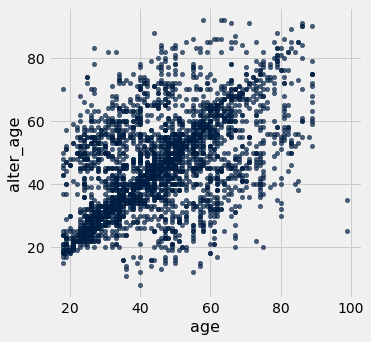

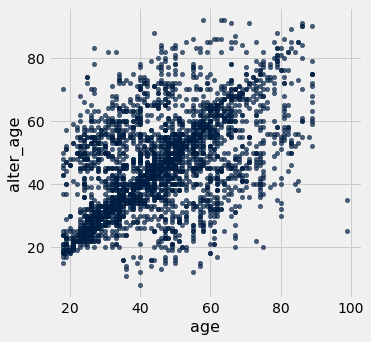

In [37]:
gss_2004_long.scatter('age', 'alter_age')
gss_2004_long.scatter('age', 'alter_age')

**Question 12** What do the scatter plots you made suggest about age homophily in Americans' confidant networks? (Note: there is no single right answer here -- I just want you to interpret the plots and provide an argument for why your interpretation might be right.)

<!--
BEGIN QUESTION
name: q12
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [ ]:
# results: 
# 1. The data shows that there is a high probability that a peer will become a confidant.
# 2. The age difference is about 35 years old and the probability of becoming a confidant is greater.

# interpret:

# From the scatter plot, we can see that most of the points in the graph have a straight line 
# with a slope of 45 degrees printed from the origin. It means This means that the respondent 
# is similar in age to his friends.

# Breadth first search

In class, we did an example using the ARPANET graph that systematically compute the distance between one node (MIT) and every other node (lecture 2). The searching algorithm we used is called breadth first search. Use this algorithm and calculate the longest distance between two nodes in the following graph.

<img src="bfs.png" width="240" height="180" align="center"/>
<br>


**Question 13** Write down the steps for searching in the following box and enter the  distance between node A and any other node as 'distance'.


<!--
BEGIN QUESTION
name: q12
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [ ]:
# some definitions:
# di : Nodes that have distance 1 with A

# Round one (calculate d1): 
# d1 : B, C, D, G, F

# Round two (calculate d2): 
# d2 : E, H

# Round three (calculate d3): 
# d3 : I 
# all note is arrived! loop finish! 

# distance = 3

# SUBMIT YOUR ASSIGNMENT

You can rerun all the tests before submitting the homework if you'd like to.

In [75]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw01.ipynb', 'hw01.pdf')
ok.submit()

Generating PDF...
Saved hw01.pdf


<IPython.core.display.Javascript object>